Conceito:

A Estimativa da Densidade de Kernel (KDE) é uma técnica não paramétrica para estimar a função de densidade de probabilidade de uma variável aleatória.

Em vez de assumir uma forma específica para a distribuição (como a normal, exponencial, etc.), a KDE utiliza os dados disponíveis para construir uma estimativa suave da densidade. 

Em Python, você pode usar a biblioteca seaborn para realizar a KDE de forma simples e visualmente atraente. Abaixo, apresento um exemplo que gera dados de uma distribuição normal e plota a estimativa da densidade de kernel.

Princípios Básicos da KDE

    Kernel: Um kernel é uma função que atribui pesos a pontos de dados em relação a um ponto específico. Os kernels mais comuns incluem:
        Gaussiano: A função gaussiana é frequentemente usada devido à sua suavidade e propriedades matemáticas.
        Epanechnikov: Uma função quadrática que é zero fora de um intervalo específico.
        Uniforme: Atribui o mesmo peso a todos os pontos dentro de um intervalo.

    Largura da Banda (Bandwidth): A largura da banda é um parâmetro crucial na KDE que controla a suavidade da estimativa. Uma largura de banda pequena resulta em uma estimativa mais "picotada", enquanto uma largura de banda grande resulta em uma estimativa mais suave. A escolha da largura da banda pode afetar significativamente a interpretação da densidade.

    Estimativa da Densidade: Para cada ponto x onde queremos estimar a densidade, a KDE calcula a densidade como a soma das contribuições de todos os pontos de dados, ponderadas pelo kernel. A fórmula geral para a estimativa da densidade em um ponto x é:

$
\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - X_i}{h}\right)
$

Onde:

$\hat{f}(x)$ é a estimativa da densidade em x.

$n$ é o número total de pontos de dados.

$h$ é a largura da banda.

$K$ é a função kernel.

$X_i$ são os pontos de dados.

Passos para Realizar a KDE

    Escolha do Kernel: Decida qual função kernel usar (por exemplo, gaussiana).

    Escolha da Largura da Banda: Determine a largura da banda. Isso pode ser feito manualmente ou usando métodos automáticos, como o método de Silverman ou o método de Sheather-Jones.

    Cálculo da Densidade: Para cada ponto onde você deseja estimar a densidade, aplique a fórmula da KDE, somando as contribuições de todos os pontos de dados.

    Visualização: Plote a estimativa da densidade para visualizar a distribuição dos dados.

Vantagens e Desvantagens

Vantagens:

    Não requer suposições sobre a forma da distribuição subjacente.
    Pode capturar características complexas da distribuição dos dados.

Desvantagens:

    A escolha da largura da banda pode ser subjetiva e impactar os resultados.
    Pode ser sensível a outliers, especialmente com larguras de banda pequenas

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Gerar dados de uma distribuição normal
np.random.seed(0)  # Para reprodutibilidade
dados = np.random.normal(loc=0, scale=1, size=1000)  # Média 0, desvio padrão 1

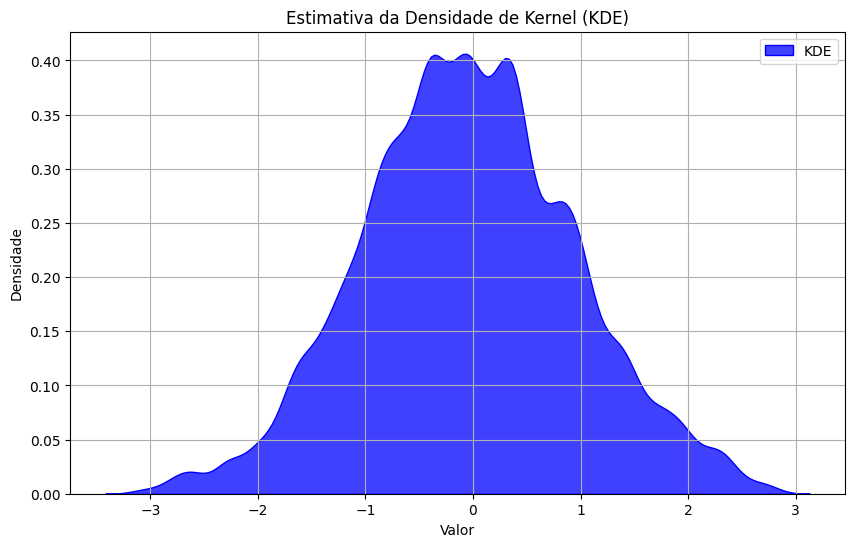

In [12]:
# Plotar a estimativa da densidade de kernel usando Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(dados, fill=True, color='blue',
            alpha=0.5, 
            bw_adjust=0.5, label='KDE')
plt.title('Estimativa da Densidade de Kernel (KDE)')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid()
plt.show()

Interpretação do Gráfico

    A largura da banda (bandwidth) (bw_adjust) afeta a suavidade da curva. Um valor menor resulta em uma curva mais "picotada", enquanto um valor maior resulta em uma curva mais suave.


# Implementação

In [13]:
def gaussian_kernel(x, x_i, bandwidth):
    """Calcula o valor do kernel gaussiano."""
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - x_i) / bandwidth) ** 2)

In [14]:
def kde(data, bandwidth, points):
    """Calcula a estimativa da densidade de kernel (KDE) para um conjunto de dados."""
    density = np.zeros(len(points))
    for i, x in enumerate(points):
        # Soma as contribuições de todos os pontos de dados
        density[i] = np.sum(gaussian_kernel(x, data, bandwidth))
    return density / len(data)  # Normaliza pela quantidade de dados

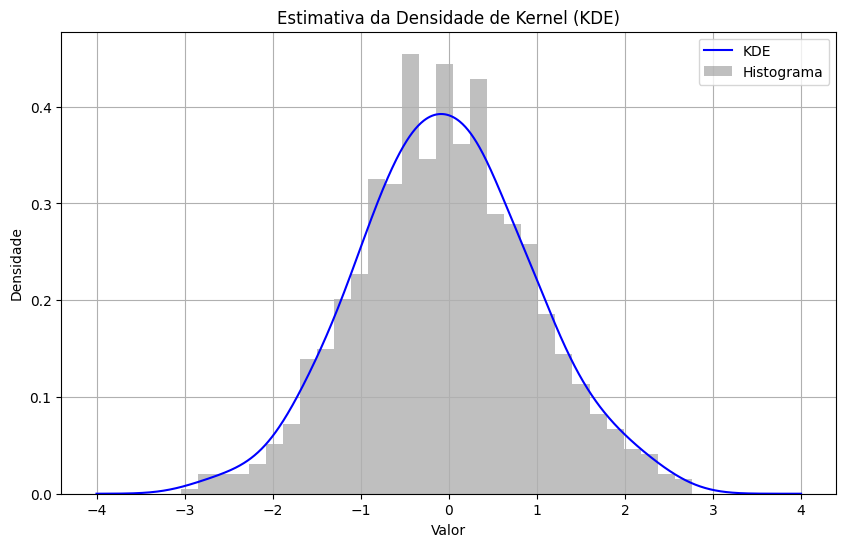

In [17]:
# Exemplo
# Gerar dados de uma distribuição normal
np.random.seed(0)
dados = np.random.normal(loc=0, scale=1, size=1000)

# Definir pontos para estimar a densidade
x_points = np.linspace(-4, 4, 1000)

# Calcular a densidade usando a função KDE
bandwidth = 0.3  # Largura da banda
density_estimate = kde(dados, bandwidth, x_points)

# Plotar a estimativa da densidade de kernel
plt.figure(figsize=(10, 6))
plt.plot(x_points, density_estimate, label='KDE', color='blue')
plt.hist(dados, bins=30, density=True, alpha=0.5, color='gray', label='Histograma')
plt.title('Estimativa da Densidade de Kernel (KDE)')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid()
plt.show()